In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [2]:
df = pd.read_csv('pharmodel_v5.csv')

In [58]:
df.cat.value_counts()

cold    451
dig     366
alg     352
pain    276
Name: cat, dtype: int64

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,asin,cat,rating,reviews,price,vp,fsa_flg,eff_max_str,...,safe_nausea,safe_vomiting,safe_allergic,safe_drowsiness,safe_stomach,safe_heart,safe_stroke,safe_heartburn,safe_lightheadedness,safe_sweating
0,0,0,B07BQKPMFM,cold,4.7,11523,12.74,0.368917,1,1,...,1,1,1,0,0,0,0,0,0,0
1,1,1,B009ITR4EY,cold,4.8,26392,7.66,0.626632,1,1,...,1,1,1,0,0,1,0,0,0,0
2,2,2,B013Q8JZVM,cold,4.8,1389,15.34,0.312907,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3,3,B074F297S8,cold,4.7,10169,7.99,0.588235,1,0,...,1,1,1,1,0,0,0,0,0,0
4,4,4,B011VX2FGQ,cold,4.7,3448,12.98,0.362096,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns[:10]

Index(['Unnamed: 0', 'Unnamed: 0.1', 'asin', 'cat', 'rating', 'reviews',
       'price', 'vp', 'fsa_flg', 'eff_max_str'],
      dtype='object')

In [5]:
df['y_class'] = df['vp_cat3']

In [6]:
# Create sym_count by counting the occurrences of 1's across sym features
df['sym_count'] = df[['sym_throat', 'sym_stomach', 'sym_sneezing', 'sym_sinus', 
                      'sym_pain', 'sym_nose', 'sym_nausea', 'sym_nasal', 'sym_migranie', 
                      'sym_menstrual', 'sym_itchy', 'sym_heart', 'sym_headache', 'sym_flu',
                      'sym_fever', 'sym_eyes', 'sym_digestion', 'sym_cough', 'sym_cold', 'sym_chest',
                      'sym_arthritis', 'sym_allergy', 'sym_acid']].sum(axis=1)

In [7]:
df['safe_count'] = df[['safe_rash', 'safe_fever', 'safe_liver',
       'safe_throat', 'safe_skin', 'safe_nausea', 'safe_vomiting',
       'safe_allergic', 'safe_drowsiness', 'safe_stomach', 'safe_heart',
       'safe_stroke', 'safe_heartburn', 'safe_lightheadedness',
       'safe_sweating']].sum(axis=1)

In [8]:
X_features = ['sym_count','fsa_flg', 'eff_max_str', 'eff_fast_acting', 'eff_long_lasting',
       'eff_non_drowsy', 'eff_kid', 'ingre_zinc', 'ingre_simethicone', 'ingre_pulsatilla',
       'ingre_phosphorus', 'ingre_phenylephrine', 'ingre_perfoliatum',
       'ingre_peppermint', 'ingre_omeprazole', 'ingre_naproxen',
       'ingre_menthol', 'ingre_magnesium', 'ingre_loratadine', 'ingre_kali',
       'ingre_ipecacuanha', 'ingre_ibuprofen', 'ingre_hydrobromide',
       'ingre_guaifenesin', 'ingre_gelsemium', 'ingre_fexofenadine',
       'ingre_famotidine', 'ingre_eupatorium', 'ingre_eucalyptus',
       'ingre_esomeprazole', 'ingre_echinacea', 'ingre_doxylamine',
       'ingre_diphenhydramine', 'ingre_dextromethorphan',
       'ingre_chlorpheniramine', 'ingre_cetirizine', 'ingre_calcium',
       'ingre_bryonia', 'ingre_antihistamine', 'ingre_aluminum',
       'ingre_acetaminophen', 'brand_zyrtec', 'brand_zicam',
       'brand_zegerid_otc', 'brand_vicks', 'brand_tylenol', 'brand_tums',
       'brand_time_cap_labs_inc', 'brand_theraflu', 'brand_rolaids',
       'brand_rite_aid', 'brand_quality_choice', 'brand_prilosec',
       'brand_prelief', 'brand_pepto_bismol', 'brand_pepcid', 'brand_nexium',
       'brand_natures_way', 'brand_mylanta', 'brand_mucinex', 'brand_motrin',
       'brand_midol', 'brand_major', 'brand_hylands', 'brand_goodsense',
       'brand_gaviscon', 'brand_flonase', 'brand_excedrin',
       'brand_coricidin_hbp', 'brand_claritin', 'brand_chloraseptic',
       'brand_boiron', 'brand_benadryl', 'brand_amazon_basic_care',
       'brand_allegra', 'brand_alka_seltzer_plus', 'brand_alka_seltzer',
       'brand_aleve', 'brand_airborne', 'brand_advil', 'brand_a2z_store',
       'manu_gsk', 'manu_jj', 'manu_bayer', 'manu_rb', 'manu_perrigo',
       'manu_pg', 'manu_sanofi', 'manu_ama', 'manu_major', 'manu_rite',
       'manu_boiron', 'manu_pfizer', 'manu_hyland', 'manu_alka',
       'manu_allegiant', 'manu_prestige', 'manu_dwight', 'manu_emc', 'manu_nw',
       'manu_walmart', 'manu_kirkland', 'manu_ohm', 'manu_reddy',
       'manu_bionpharma', 'manu_time', 'count_q_00', 'count_q_10',
       'count_q_20', 'count_q_30', 'inch_q_00', 'inch_q_10', 'inch_q_20',
       'inch_q_30', 'weight_q_00', 'weight_q_10', 'weight_q_20', 'weight_q_30',
             'safe_count']

# change category

In [9]:
data = df[df.cat=='dig'][X_features+['y_class','vp', 'cat', 'asin', 'rating', 'reviews', 'price']]

In [10]:
data.y_class.value_counts()

1    183
0    183
Name: y_class, dtype: int64

In [59]:
data.shape

(366, 130)

In [60]:
sum(data[['brand_zyrtec', 'brand_zicam',
       'brand_zegerid_otc', 'brand_vicks', 'brand_tylenol', 'brand_tums',
       'brand_time_cap_labs_inc', 'brand_theraflu', 'brand_rolaids',
       'brand_rite_aid', 'brand_quality_choice', 'brand_prilosec',
       'brand_prelief', 'brand_pepto_bismol', 'brand_pepcid', 'brand_nexium',
       'brand_natures_way', 'brand_mylanta', 'brand_mucinex', 'brand_motrin',
       'brand_midol', 'brand_major', 'brand_hylands', 'brand_goodsense',
       'brand_gaviscon', 'brand_flonase', 'brand_excedrin',
       'brand_coricidin_hbp', 'brand_claritin', 'brand_chloraseptic',
       'brand_boiron', 'brand_benadryl', 'brand_amazon_basic_care',
       'brand_allegra', 'brand_alka_seltzer_plus', 'brand_alka_seltzer',
       'brand_aleve', 'brand_airborne', 'brand_advil', 'brand_a2z_store']].sum())

184

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV,  cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.pipeline import Pipeline
import numpy as np

# Load dataset and split into training, validation, and testing sets

X_train, y_train, z = data[X_features], data['y_class'], data['vp']
# X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, test_size=0.2, random_state=42, stratify=y)


# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'MLP': MLPClassifier(early_stopping=True, max_iter=1000,random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Gaussian NB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'LDA': LinearDiscriminantAnalysis()
}

# Hyperparameters for grid search
param_grids = {
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200,300],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__bootstrap':[True,False]
    }
     ,
    'XGBoost': {
        'classifier__learning_rate': [0.01, 0.05, 0.1],
        'classifier__n_estimators': [100, 200,300],
        'classifier__max_depth': [3, 5, 7],
    },
    'MLP': {
        'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'classifier__activation': ['relu', 'tanh'],
        'classifier__solver': ['adam', 'sgd'],
    }
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

for name, model in models.items():
    print(f"===== {name} =====")
    
    pipeline = Pipeline([
        ('classifier', model)
    ])
    
    # If the model has hyperparameters to tune, apply GridSearchCV
    if name in param_grids:
        grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_pipeline = grid_search.best_estimator_
#         if name == 'Random Forest':
#             rf_model = best_pipeline
        # Output the best hyperparameters for each model
        print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
    else:
        best_pipeline = pipeline
        best_pipeline.fit(X_train, y_train)
    
    if name == 'Random Forest':
        rf_model = best_pipeline
    if name == 'XGBoost':
        gb_model = best_pipeline
    if name == 'LDA':
        lda_model = best_pipeline
    if name == 'Logistic Regression':
        lr_model = best_pipeline
    
    # Cross-Validation metrics
    cv_results = cross_validate(best_pipeline, X_train, y_train, cv=5, scoring=scoring)
    
    for metric in scoring.keys():
        mean_metric = np.mean(cv_results[f'test_{metric}'])
        std_metric = np.std(cv_results[f'test_{metric}'])
        print(cv_results[f'test_{metric}'],f"{metric.capitalize()}: {mean_metric:.4f} ± {std_metric:.4f}")

        
    print()

===== Logistic Regression =====
[0.51351351 0.64383562 0.5890411  0.68493151 0.64383562] Accuracy: 0.6150 ± 0.0592
[0.50909091 0.65714286 0.59459459 0.70967742 0.65625   ] Precision: 0.6254 ± 0.0686
[0.75675676 0.62162162 0.59459459 0.61111111 0.58333333] Recall: 0.6335 ± 0.0630
[0.60869565 0.63888889 0.59459459 0.65671642 0.61764706] F1: 0.6233 ± 0.0220
[0.61139518 0.74174174 0.6463964  0.78115616 0.7210961 ] Roc_auc: 0.7004 ± 0.0624

===== Decision Tree =====
[0.51351351 0.64383562 0.63013699 0.56164384 0.64383562] Accuracy: 0.5986 ± 0.0523
[0.5106383  0.65714286 0.625      0.55555556 0.66666667] Precision: 0.6030 ± 0.0604
[0.64864865 0.62162162 0.67567568 0.55555556 0.55555556] Recall: 0.6114 ± 0.0487
[0.57142857 0.63888889 0.64935065 0.55555556 0.60606061] F1: 0.6043 ± 0.0366
[0.50511322 0.65653153 0.64076577 0.56156156 0.64489489] Roc_auc: 0.6018 ± 0.0589

===== MLP =====
Best hyperparameters for MLP: {'classifier__activation': 'relu', 'classifier__hidden_layer_sizes': (50, 50), '

# Variable importance

In [12]:
## 1shap

In [13]:
#pip install shap

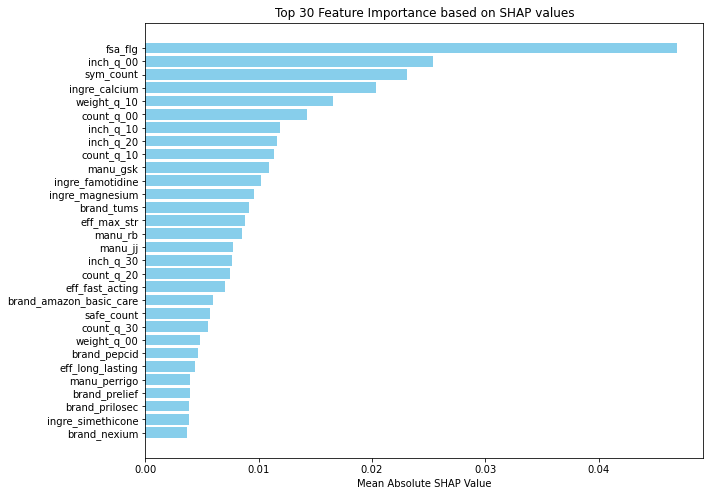

In [14]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Create a SHAP explainer object
explainer = shap.TreeExplainer(rf_model.named_steps['classifier'])
shap_values = explainer.shap_values(X_train)

# Calculate absolute mean SHAP values
mean_abs_shap_values = np.mean(np.abs(shap_values[1]), axis=0)  # Considering only the positive class

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame

# Get indices of top 30 features sorted by absolute SHAP values
top_indices = np.argsort(mean_abs_shap_values)[::-1][:30]

# Select top 30 feature names and corresponding mean absolute SHAP values
top_feature_names = [feature_names[i] for i in top_indices]
top_mean_abs_shap_values = mean_abs_shap_values[top_indices]

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.barh(range(len(top_feature_names)), top_mean_abs_shap_values, align='center', color='skyblue')
plt.yticks(range(len(top_feature_names)), top_feature_names)
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Top 30 Feature Importance based on SHAP values')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()

In [15]:
top_feature_names

['fsa_flg',
 'inch_q_00',
 'sym_count',
 'ingre_calcium',
 'weight_q_10',
 'count_q_00',
 'inch_q_10',
 'inch_q_20',
 'count_q_10',
 'manu_gsk',
 'ingre_famotidine',
 'ingre_magnesium',
 'brand_tums',
 'eff_max_str',
 'manu_rb',
 'manu_jj',
 'inch_q_30',
 'count_q_20',
 'eff_fast_acting',
 'brand_amazon_basic_care',
 'safe_count',
 'count_q_30',
 'weight_q_00',
 'brand_pepcid',
 'eff_long_lasting',
 'manu_perrigo',
 'brand_prelief',
 'brand_prilosec',
 'ingre_simethicone',
 'brand_nexium']

In [16]:
# import shap
# import numpy as np
# import matplotlib.pyplot as plt

# # Create a SHAP explainer object
# explainer = shap.TreeExplainer(rf_model.named_steps['classifier'])
# shap_values = explainer.shap_values(X_train)

# # Calculate absolute mean SHAP values
# mean_abs_shap_values = np.mean(np.abs(shap_values[1]), axis=0)  # Considering only the positive class

# # Get feature names
# feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame

# # Get indices of top 30 features sorted by absolute SHAP values
# top_indices = np.argsort(mean_abs_shap_values)[::-1][:30]

# # Select top 30 feature names and corresponding mean absolute SHAP values
# top_feature_names = [
#     'FSA or HSA Eligible',
#     'Size/Inches (Lowest Quantile)',
#     'Symptom Treats Count',
#     'Ingredient - Calcium',
#     'Size/Weight (Low Quantile)',
#     'Size/Counts per Pack (Lowest Quantile)',
#     'Size/Inches (Low Quantile)',
#     'Size/Inches (High Quantile)',
#     'Size/Counts per Pack (Low Quantile)',
#     'Manufacturer - GSK',
#     'Ingredient - Famotidine',
#     'Ingredient - Magnesium',
#     'Brand - Tums',
#     'Special Effect - Maximum Strength',
#     'Manufacturer - Reckitt Benckiser',
#     'Manufacturer - Johnson & Johnson',
#     'Size/Inches (Highest Quantile)',
#     'Size/Counts per Pack (High Quantile)',
#     'Special Effect - Fast-Acting',
#     'Brand - Amazon Basic Care',
#     'Safety Warning Count',
#     'Size/Counts per Pack (Highest Quantile)',
#     'Size/Weight (Lowest Quantile)',
#     'Brand - Pepcid',
#     'Special Effect - Long-Lasting',
#     'Manufacturer - Perrigo',
#     'Brand - Prelief',
#     'Brand - Prilosec',
#     'Ingredient - Simethicone',
#     'Brand - Nexium'
# ]

# top_mean_abs_shap_values = mean_abs_shap_values[top_indices]

# # Create a bar chart with sky blue color
# plt.figure(figsize=(12, 10))
# plt.barh(range(len(top_feature_names)), top_mean_abs_shap_values, align='center', color='Turquoise')
# plt.yticks(range(len(top_feature_names)), top_feature_names, fontsize=12)  # Adjust font size
# plt.xlabel('Mean Absolute SHAP Value', fontsize=14)  # Adjust font size
# #plt.ylabel('Feature', fontsize=14)  # Adjust font size
# plt.title('Allergy Medicine Important Factors Impacting CER based on SHAP Values (Top 30)', fontsize=16)  # Adjust font size
# plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
# plt.show()

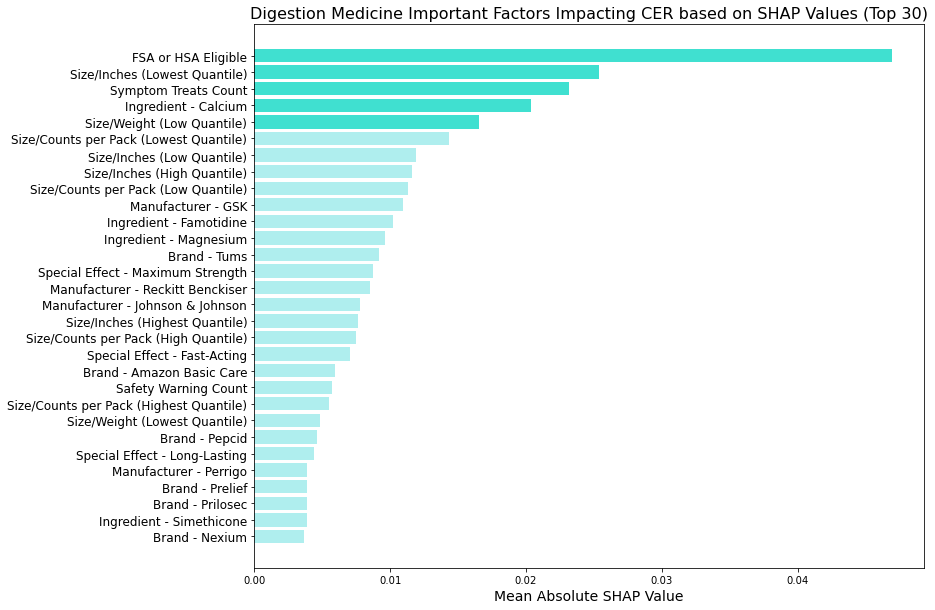

In [17]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Create a SHAP explainer object
explainer = shap.TreeExplainer(rf_model.named_steps['classifier'])
shap_values = explainer.shap_values(X_train)

# Calculate absolute mean SHAP values
mean_abs_shap_values = np.mean(np.abs(shap_values[1]), axis=0)  # Considering only the positive class

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame

# Get indices of top 30 features sorted by absolute SHAP values
top_indices = np.argsort(mean_abs_shap_values)[::-1][:30]

# Select top 30 feature names and corresponding mean absolute SHAP values
top_feature_names = [
    'FSA or HSA Eligible',
    'Size/Inches (Lowest Quantile)',
    'Symptom Treats Count',
    'Ingredient - Calcium',
    'Size/Weight (Low Quantile)',
    'Size/Counts per Pack (Lowest Quantile)',
    'Size/Inches (Low Quantile)',
    'Size/Inches (High Quantile)',
    'Size/Counts per Pack (Low Quantile)',
    'Manufacturer - GSK',
    'Ingredient - Famotidine',
    'Ingredient - Magnesium',
    'Brand - Tums',
    'Special Effect - Maximum Strength',
    'Manufacturer - Reckitt Benckiser',
    'Manufacturer - Johnson & Johnson',
    'Size/Inches (Highest Quantile)',
    'Size/Counts per Pack (High Quantile)',
    'Special Effect - Fast-Acting',
    'Brand - Amazon Basic Care',
    'Safety Warning Count',
    'Size/Counts per Pack (Highest Quantile)',
    'Size/Weight (Lowest Quantile)',
    'Brand - Pepcid',
    'Special Effect - Long-Lasting',
    'Manufacturer - Perrigo',
    'Brand - Prelief',
    'Brand - Prilosec',
    'Ingredient - Simethicone',
    'Brand - Nexium'
]

top_mean_abs_shap_values = mean_abs_shap_values[top_indices]

# Determine the top 5 factors among the top 30 important features
top_5_indices = np.argsort(top_mean_abs_shap_values)[-5:]
top_5_feature_names = [top_feature_names[i] for i in top_5_indices]

# Create a color list for highlighting the top 5 factors
colors = ['PaleTurquoise' if feature_name not in top_5_feature_names else 'Turquoise' for feature_name in top_feature_names]

# Create the bar chart with highlighted top 5 factors
plt.figure(figsize=(12, 10))
plt.barh(range(len(top_feature_names)), top_mean_abs_shap_values, align='center', color=colors)
plt.yticks(range(len(top_feature_names)), top_feature_names, fontsize=12)  # Adjust font size
plt.xlabel('Mean Absolute SHAP Value', fontsize=14)  # Adjust font size
plt.title('Digestion Medicine Important Factors Impacting CER based on SHAP Values (Top 30)', fontsize=16)  # Adjust font size
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()

In [18]:
#type(variable_info[])

In [20]:
import pandas as pd

# Extract coefficient estimates
coefficients = lr_model.named_steps['classifier'].coef_[0]

# Calculate p-values (not directly available in scikit-learn)
# You would typically use statsmodels for p-values with logistic regression

# Create a DataFrame to store coefficients and p-values
variable_info = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Calculate absolute coefficients
variable_info['Absolute Coefficient'] = abs(variable_info['Coefficient'])

# Sort variables based on absolute coefficient values
variable_info.sort_values(by='Absolute Coefficient', ascending=False, inplace=True)

# You should determine statistical significance based on your chosen method
# Since we don't have p-values directly, you might need to use other statistical tools
# For demonstration purposes, I'm assuming all coefficients are statistically significant
variable_info['Significance'] = True

# Print the ranked variables and their statistical significance
# print(variable_info[:20])

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# List of top features
top_features = ['fsa_flg', 'inch_q_00', 'sym_count', 'ingre_calcium', 'weight_q_10', 'count_q_00', 'inch_q_10', 'inch_q_20', 'count_q_10', 'manu_gsk', 'ingre_famotidine', 'ingre_magnesium', 'brand_tums', 'eff_max_str', 'manu_rb', 'manu_jj', 'inch_q_30', 'count_q_20', 'eff_fast_acting', 'brand_amazon_basic_care', 'safe_count', 'count_q_30', 'weight_q_00', 'brand_pepcid', 'eff_long_lasting', 'manu_perrigo', 'brand_prelief', 'brand_prilosec', 'ingre_simethicone', 'brand_nexium']

# New mapping of feature names to new names
feature_mapping = {
    'fsa_flg': 'FSA or HSA Eligible',
    'inch_q_00': 'Size/Inches (Lowest Quantile)',
    'sym_count': 'Symptom Treats Count',
    'ingre_calcium': 'Ingredient - Calcium',
    'weight_q_10': 'Size/Weight (Low Quantile)',
    'count_q_00': 'Size/Counts per Pack (Lowest Quantile)',
    'inch_q_10': 'Size/Inches (Low Quantile)',
    'inch_q_20': 'Size/Inches (High Quantile)',
    'count_q_10': 'Size/Counts per Pack (Low Quantile)',
    'manu_gsk': 'Manufacturer - GSK',
    'ingre_famotidine': 'Ingredient - Famotidine',
    'ingre_magnesium': 'Ingredient - Magnesium',
    'brand_tums': 'Brand - Tums',
    'eff_max_str': 'Special Effect - Maximum Strength',
    'manu_rb': 'Manufacturer - Reckitt Benckiser',
    'manu_jj': 'Manufacturer - Johnson & Johnson',
    'inch_q_30': 'Size/Inches (Highest Quantile)',
    'count_q_20': 'Size/Counts per Pack (High Quantile)',
    'eff_fast_acting': 'Special Effect - Fast-Acting',
    'brand_amazon_basic_care': 'Brand - Amazon Basic Care',
    'safe_count': 'Safety Warning Count',
    'count_q_30': 'Size/Counts per Pack (Highest Quantile)',
    'weight_q_00': 'Size/Weight (Lowest Quantile)',
    'brand_pepcid': 'Brand - Pepcid',
    'eff_long_lasting': 'Special Effect - Long-Lasting',
    'manu_perrigo': 'Manufacturer - Perrigo',
    'brand_prelief': 'Brand - Prelief',
    'brand_prilosec': 'Brand - Prilosec',
    'ingre_simethicone': 'Ingredient - Simethicone',
    'brand_nexium': 'Brand - Nexium'
}

# Filter variable_info to include only rows where the Feature is in top_features
filtered_variable_info = variable_info[variable_info['Feature'].isin(top_features)]

# Map the 'Feature' column to the new feature names and create a new column 'Feature2'
filtered_variable_info['Feature2'] = filtered_variable_info['Feature'].map(feature_mapping)

# Reorder the DataFrame based on the order of top_features
filtered_variable_info['Feature'] = pd.Categorical(filtered_variable_info['Feature'], categories=top_features, ordered=True)
filtered_variable_info = filtered_variable_info.sort_values('Feature')

# Print the DataFrame with the new 'Feature2' column
print(filtered_variable_info[['Feature2', 'Coefficient', 'Significance']])

                                    Feature2  Coefficient  Significance
1                        FSA or HSA Eligible     0.837722          True
110            Size/Inches (Lowest Quantile)     0.911052          True
0                       Symptom Treats Count     0.094961          True
36                      Ingredient - Calcium     0.425035          True
115               Size/Weight (Low Quantile)     0.469972          True
106   Size/Counts per Pack (Lowest Quantile)     0.600035          True
111               Size/Inches (Low Quantile)     0.803636          True
112              Size/Inches (High Quantile)     0.819300          True
107      Size/Counts per Pack (Low Quantile)    -0.613007          True
81                        Manufacturer - GSK     0.501596          True
26                   Ingredient - Famotidine     1.273209          True
17                    Ingredient - Magnesium     0.912555          True
46                              Brand - Tums     0.445413       


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


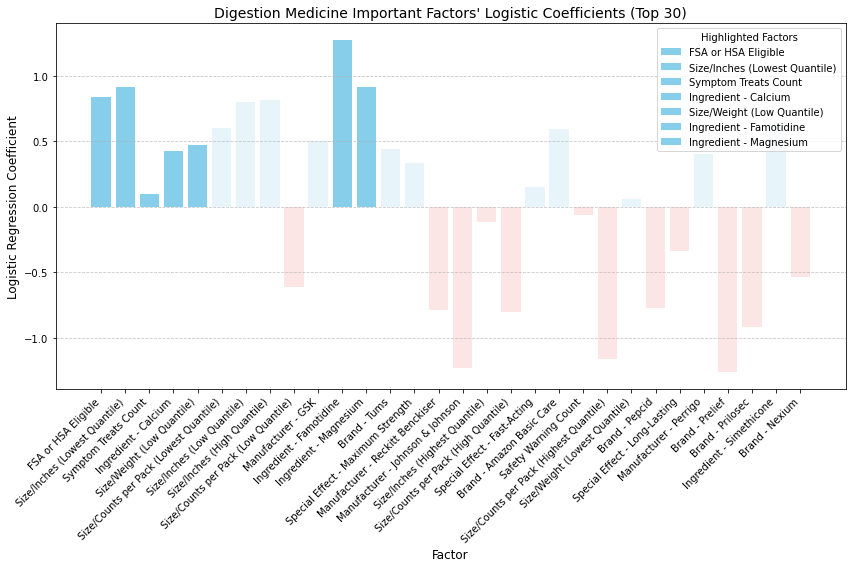

In [22]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Highlight specified factors
highlighted_factors = [
    'FSA or HSA Eligible',
    'Size/Inches (Lowest Quantile)',
    'Symptom Treats Count',
    'Ingredient - Calcium',
    'Size/Weight (Low Quantile)',
    'Ingredient - Famotidine',
    'Ingredient - Magnesium'
]

# Plotting
plt.figure(figsize=(12, 8))  # Increased figure size
colors = ['skyblue' if c >= 0 else 'lightcoral' for c in filtered_variable_info['Coefficient']]

# Set alpha for bars based on highlighted factors
alphas = [1 if factor in highlighted_factors else 0.2 for factor in filtered_variable_info['Feature2']]

bars = plt.bar(range(len(filtered_variable_info)), filtered_variable_info['Coefficient'], color=colors, alpha=0.5)  # Set alpha for all bars
for i, alpha in enumerate(alphas):
    bars[i].set_alpha(alpha)  # Set alpha for specified factors

plt.xlabel('Factor', fontsize=12)  # Increased font size
plt.ylabel('Logistic Regression Coefficient', fontsize=12)  # Increased font size
plt.title("Digestion Medicine Important Factors' Logistic Coefficients (Top 30)", fontsize=14)  # Increased title font size
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=range(len(filtered_variable_info)), labels=filtered_variable_info['Feature2'], rotation=45, ha='right', fontsize=10)  # Adjusted x-ticks
plt.yticks(fontsize=10)  # Increased font size for y-axis labels
plt.tight_layout()

# Create custom legend with only the labels for the highlighted factors and their respective colors
highlighted_colors = ['skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue']
highlighted_elements = [Patch(facecolor=color, alpha=1, label=factor) for factor, color in zip(highlighted_factors, highlighted_colors)]
plt.legend(handles=highlighted_elements, loc='upper right', fontsize=10, title='Highlighted Factors')

# Increase y-axis limit
#plt.ylim(bottom=-1.5, top=filtered_variable_info['Coefficient'].max() * 1.5)

plt.show()

In [ ]:
## validate coef
'ingre_calcium','ingre_famotidine','ingre_magnesium'

In [23]:
data.groupby('ingre_calcium')['vp'].mean()

ingre_calcium
0    0.323032
1    0.504848
Name: vp, dtype: float64

In [24]:
data.groupby('ingre_famotidine')['vp'].mean()

ingre_famotidine
0    0.349076
1    0.443697
Name: vp, dtype: float64

In [25]:
data.groupby('ingre_magnesium')['vp'].mean()

ingre_magnesium
0    0.342694
1    0.428646
Name: vp, dtype: float64

## analyze top ingredients brand

In [ ]:
#'ingre_calcium', 'ingre_famotidine', 'ingre_magnesium'

In [66]:
data[['brand_zyrtec', 'brand_zicam',
       'brand_zegerid_otc', 'brand_vicks', 'brand_tylenol', 'brand_tums',
       'brand_time_cap_labs_inc', 'brand_theraflu', 'brand_rolaids',
       'brand_rite_aid', 'brand_quality_choice', 'brand_prilosec',
       'brand_prelief', 'brand_pepto_bismol', 'brand_pepcid', 'brand_nexium',
       'brand_natures_way', 'brand_mylanta', 'brand_mucinex', 'brand_motrin',
       'brand_midol', 'brand_major', 'brand_hylands', 'brand_goodsense',
       'brand_gaviscon', 'brand_flonase', 'brand_excedrin',
       'brand_coricidin_hbp', 'brand_claritin', 'brand_chloraseptic',
       'brand_boiron', 'brand_benadryl', 'brand_amazon_basic_care',
       'brand_allegra', 'brand_alka_seltzer_plus', 'brand_alka_seltzer',
       'brand_aleve', 'brand_airborne', 'brand_advil', 'brand_a2z_store']].sum().sort_values()

brand_zyrtec                0
brand_airborne              0
brand_aleve                 0
brand_allegra               0
brand_benadryl              0
brand_chloraseptic          0
brand_claritin              0
brand_coricidin_hbp         0
brand_flonase               0
brand_midol                 0
brand_advil                 0
brand_mucinex               0
brand_motrin                0
brand_zicam                 0
brand_vicks                 0
brand_tylenol               0
brand_time_cap_labs_inc     0
brand_theraflu              0
brand_alka_seltzer_plus     1
brand_natures_way           1
brand_boiron                1
brand_excedrin              2
brand_quality_choice        2
brand_hylands               2
brand_a2z_store             3
brand_major                 4
brand_pepto_bismol          4
brand_rite_aid              5
brand_zegerid_otc           5
brand_rolaids               7
brand_prelief               7
brand_mylanta               9
brand_goodsense            11
brand_nexi

In [93]:
import pandas as pd

# Initialize an empty DataFrame to store the results
brand_result = pd.DataFrame(columns=['Brand', 'Count', 'Mean_Magnesium', 'Mean_Calcium', 'Mean_Famotidine'])

# Define the list of brand columns
brand_columns = ['brand_alka_seltzer_plus', 'brand_natures_way', 'brand_boiron', 'brand_excedrin',
                 'brand_quality_choice', 'brand_hylands', 'brand_a2z_store', 'brand_major', 'brand_pepto_bismol',
                 'brand_rite_aid', 'brand_zegerid_otc', 'brand_rolaids', 'brand_prelief', 'brand_mylanta',
                 'brand_goodsense', 'brand_nexium', 'brand_gaviscon', 'brand_prilosec', 'brand_pepcid',
                 'brand_amazon_basic_care', 'brand_alka_seltzer', 'brand_tums']

# Define the mapping of brand names
brand_names = ['Alka-Seltzer Plus', "Nature's Way", 'Boiron', 'Excedrin', 'Quality Choice', 'Hylands', 
               'A2Z Store', 'Major', 'Pepto Bismol', 'Rite Aid', 'Zegerid OTC', 'Rolaids', 'Prelief', 
               'Mylanta', 'GoodSense', 'Nexium', 'Gaviscon', 'Prilosec', 'Pepcid', 'Amazon Basic Care', 
               'Alka-Seltzer', 'Tums']

# Iterate over each brand column
for idx, brand_col in enumerate(brand_columns):
    # Filter the DataFrame where the current brand column equals 1
    brand_data = data[data[brand_col] == 1]
    
    # Calculate the count and mean of 'ingre_magnesium'
    count_mean_magnesium = brand_data['ingre_magnesium'].agg(['count', 'mean'])
    
    # Calculate the count and mean of 'ingre_calcium'
    count_mean_calcium = brand_data['ingre_calcium'].agg(['count', 'mean'])
    
    # Calculate the count and mean of 'ingre_famotidine'
    count_mean_famotidine = brand_data['ingre_famotidine'].agg(['count', 'mean'])
    
    # Append the results to the brand_result DataFrame
    brand_result = brand_result.append({'Brand': brand_names[idx],
                                        'Count': count_mean_magnesium['count'],
                                        'Mean_Magnesium': count_mean_magnesium['mean'],
                                        'Mean_Calcium': count_mean_calcium['mean'],
                                        'Mean_Famotidine': count_mean_famotidine['mean']},
                                       ignore_index=True)

# Display the brand_result DataFrame
print(brand_result)

                Brand  Count  Mean_Magnesium  Mean_Calcium  Mean_Famotidine
0   Alka-Seltzer Plus    1.0        0.000000      0.000000         0.000000
1        Nature's Way    1.0        0.000000      0.000000         0.000000
2              Boiron    1.0        0.000000      0.000000         0.000000
3            Excedrin    2.0        0.000000      0.000000         0.000000
4      Quality Choice    2.0        0.000000      0.000000         0.000000
5             Hylands    2.0        0.000000      0.000000         0.000000
6           A2Z Store    3.0        0.000000      0.000000         0.000000
7               Major    4.0        0.750000      0.000000         0.000000
8        Pepto Bismol    4.0        0.000000      0.500000         0.000000
9            Rite Aid    5.0        0.200000      0.000000         0.400000
10        Zegerid OTC    5.0        0.000000      0.000000         0.000000
11            Rolaids    7.0        0.714286      0.714286         0.000000
12          

In [98]:
data.groupby('brand_tums')['ingre_calcium'].mean(),
data.groupby('brand_prelief')['ingre_calcium'].mean(),
data.groupby('brand_rolaids')['ingre_calcium'].mean(),
data.groupby('brand_mylanta')['ingre_calcium'].mean(),

(brand_mylanta
 0    0.176471
 1    0.444444
 Name: ingre_calcium, dtype: float64,)

In [100]:
data.groupby('brand_pepcid')['ingre_famotidine'].mean(),

(brand_pepcid
 0    0.056818
 1    0.571429
 Name: ingre_famotidine, dtype: float64,)

In [102]:
data.groupby('brand_rolaids')['ingre_magnesium'].mean(),data.groupby('brand_mylanta')['ingre_magnesium'].mean(),

(brand_rolaids
 0    0.147632
 1    0.714286
 Name: ingre_magnesium, dtype: float64,
 brand_mylanta
 0    0.148459
 1    0.555556
 Name: ingre_magnesium, dtype: float64)